In [22]:
import os
import glob
from functools import reduce

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

# display plots in the notebook
%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

## Response rate

In [24]:
wlc_1r_rr_data = pd.read_csv('../../../../../../results/timeseries/timeout-1sec/time-varying/all-backends/10s/2mins-run/wlc/1st-seed-run/response_rate.csv', header=0, na_filter=False)
wlc_2r_rr_data = pd.read_csv('../../../../../../results/timeseries/timeout-1sec/time-varying/all-backends/10s/2mins-run/wlc/2nd-seed-run/response_rate.csv', header=0, na_filter=False)
fdb_wlc_1r_rr_data = pd.read_csv('../../../../../../results/timeseries/timeout-1sec/time-varying/all-backends/10s/2mins-run/feedback-wlc/1st-seed-run/response_rate.csv', header=0, na_filter=False)
fdb_wlc_2r_rr_data = pd.read_csv('../../../../../../results/timeseries/timeout-1sec/time-varying/all-backends/10s/2mins-run/feedback-wlc/2nd-seed-run/response_rate.csv', header=0, na_filter=False)


In [25]:
rr_plot = pd.DataFrame()

rr_plot['percentiles'] = ['Request rate', 'Response rate 50%', 'Response rate 66%', 'Response rate 75%',
                          'Response rate 80%', 'Response rate 90%', 'Response rate 95%', 'Response rate 98%',
                          'Response rate 99%', 'Response rate 100%'] 

wlc_1r_rr_list = []
wlc_2r_rr_list = []
fdb_wlc_1r_rr_list = []
fdb_wlc_2r_rr_list = []
for i in ['Request rate', 'Response rate 50%', 'Response rate 66%', 'Response rate 75%',
          'Response rate 80%', 'Response rate 90%', 'Response rate 95%', 'Response rate 98%',
          'Response rate 99%', 'Response rate 100%']:
    wlc_1r_rr_list.append(wlc_1r_rr_data[i][0])
    wlc_2r_rr_list.append(wlc_2r_rr_data[i][0])
    fdb_wlc_1r_rr_list.append(fdb_wlc_1r_rr_data[i][0])
    fdb_wlc_2r_rr_list.append(fdb_wlc_2r_rr_data[i][0])
    
rr_plot['wlc-1r'] = wlc_1r_rr_list
rr_plot['wlc-2r'] = wlc_2r_rr_list
rr_plot['feedback-wlc-1r'] = fdb_wlc_1r_rr_list
rr_plot['feedback-wlc-2r'] = fdb_wlc_2r_rr_list

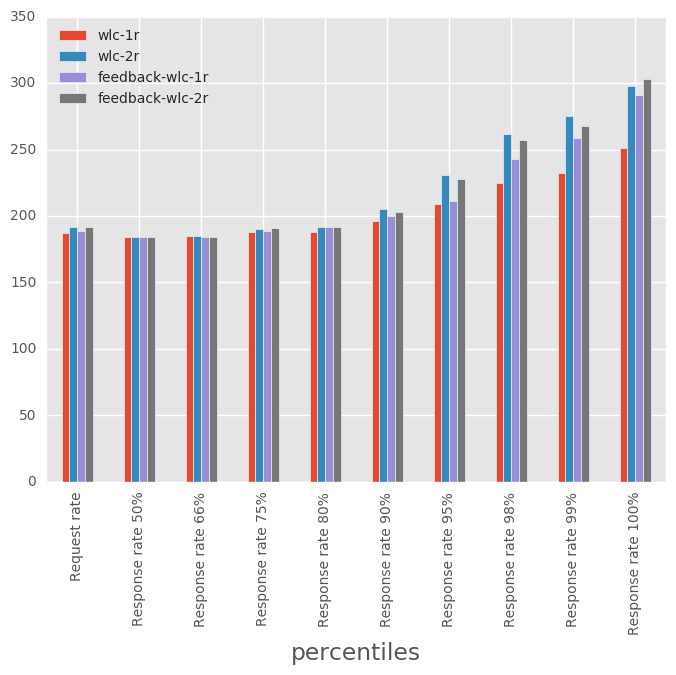

In [26]:
rr_plot.plot('percentiles', kind='bar')

## Response time

In [27]:
wlc_1r_rt_data = pd.read_csv('../../../../../../results/timeseries/timeout-1sec/time-varying/all-backends/10s/2mins-run/wlc/1st-seed-run/response_time.csv', header=0, na_filter=False)
wlc_2r_rt_data = pd.read_csv('../../../../../../results/timeseries/timeout-1sec/time-varying/all-backends/10s/2mins-run/wlc/2nd-seed-run/response_time.csv', header=0, na_filter=False)
fdb_wlc_1r_rt_data = pd.read_csv('../../../../../../results/timeseries/timeout-1sec/time-varying/all-backends/10s/2mins-run/feedback-wlc/1st-seed-run/response_time.csv', header=0, na_filter=False)
fdb_wlc_2r_rt_data = pd.read_csv('../../../../../../results/timeseries/timeout-1sec/time-varying/all-backends/10s/2mins-run/feedback-wlc/2nd-seed-run/response_time.csv', header=0, na_filter=False)


In [28]:
rt_plot = pd.DataFrame()

rt_plot['percentiles'] = ['Response time', 'Response time 50%', 'Response time 66%', 'Response time 75%',
                          'Response time 80%', 'Response time 90%', 'Response time 95%', 'Response time 98%',
                          'Response time 99%', 'Response time 100%'] 

wlc_1r_rt_list = []
wlc_2r_rt_list = []
fdb_wlc_1r_rt_list = []
fdb_wlc_2r_rt_list = []
for i in ['Response time', 'Response time 50%', 'Response time 66%', 'Response time 75%',
          'Response time 80%', 'Response time 90%', 'Response time 95%', 'Response time 98%',
          'Response time 99%', 'Response time 100%']:
    wlc_1r_rt_list.append(wlc_1r_rt_data[i][0])
    wlc_2r_rt_list.append(wlc_2r_rt_data[i][0])
    fdb_wlc_1r_rt_list.append(fdb_wlc_1r_rt_data[i][0])
    fdb_wlc_2r_rt_list.append(fdb_wlc_2r_rt_data[i][0])
    
rt_plot['wlc-1r'] = wlc_1r_rt_list
rt_plot['wlc-2r'] = wlc_2r_rt_list
rt_plot['feedback-wlc-1r'] = fdb_wlc_1r_rt_list
rt_plot['feedback-wlc-2r'] = fdb_wlc_2r_rt_list

### Percentiles ...

10sec fluctuation, 10ms feedback, 0.5 alpha, 0.001 state feedback, 0.001 stat collection.

In [29]:
wlc_err = pd.DataFrame()
fdb_wlc_err = pd.DataFrame()
for i in range(len(
    ['Response time', 'Response time 50%', 'Response time 66%', 'Response time 75%',
          'Response time 80%', 'Response time 90%', 'Response time 95%', 'Response time 98%',
          'Response time 99%', 'Response time 100%'])):
    wlc_err[rt_plot['percentiles'][i]] = [rt_plot['wlc-1r'][i],  
                                          rt_plot['wlc-2r'][i]]
    fdb_wlc_err[rt_plot['percentiles'][i]] = [rt_plot['feedback-wlc-1r'][i],  
                                              rt_plot['feedback-wlc-2r'][i]]

means = pd.DataFrame()
means['percentiles'] = rt_plot['percentiles']
errs = pd.DataFrame()
errs['percentiles'] = rt_plot['percentiles']
means['wlc'] = list(wlc_err.mean())
errs['wlc'] = list(wlc_err.std())
means['feedback-wlc'] = list(fdb_wlc_err.mean())
errs['feedback-wlc'] = list(fdb_wlc_err.std())

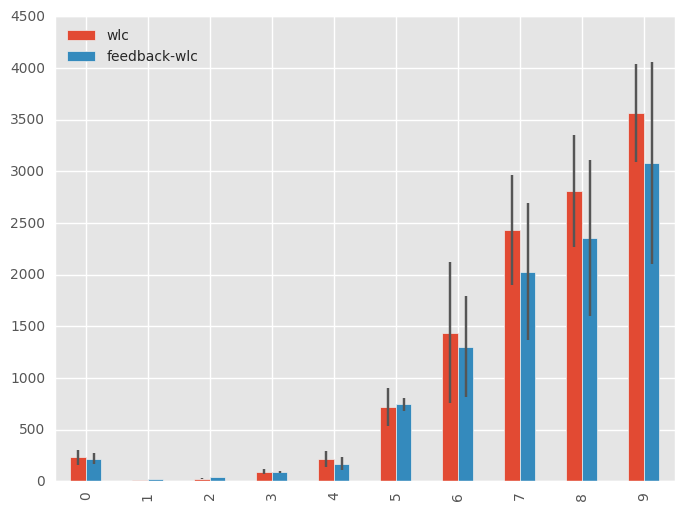

In [30]:
means.plot(kind='bar', yerr=errs)

### Below ... 
10sec fluctuation, 10ms feedback, 0.5 alpha, 0.001 state feedback, 0.001 stat collection.

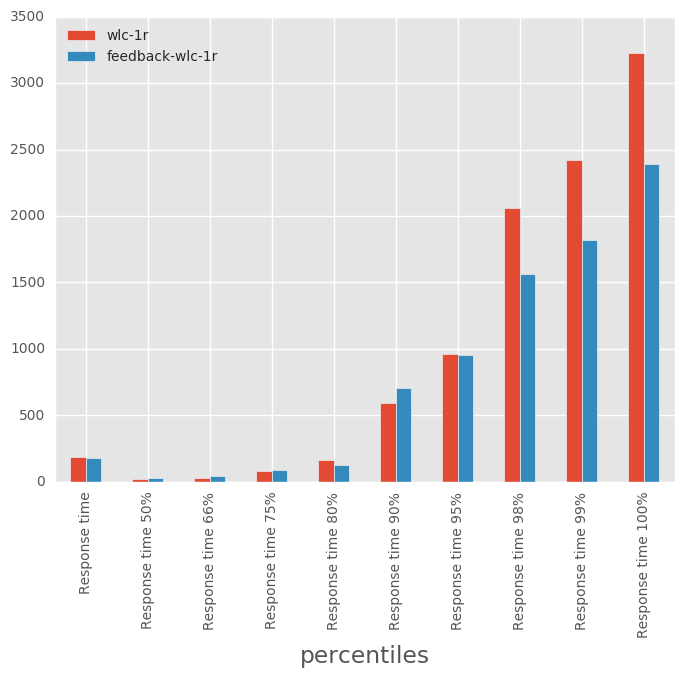

In [19]:
rt_plot[['percentiles', 'wlc-1r', 'feedback-wlc-1r']].plot('percentiles', kind='bar')

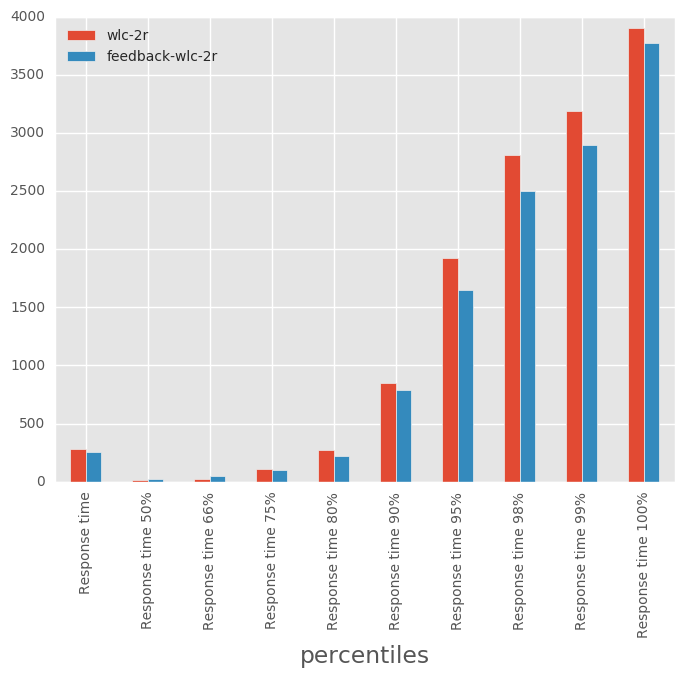

In [20]:
rt_plot[['percentiles', 'wlc-2r', 'feedback-wlc-2r']].plot('percentiles', kind='bar')

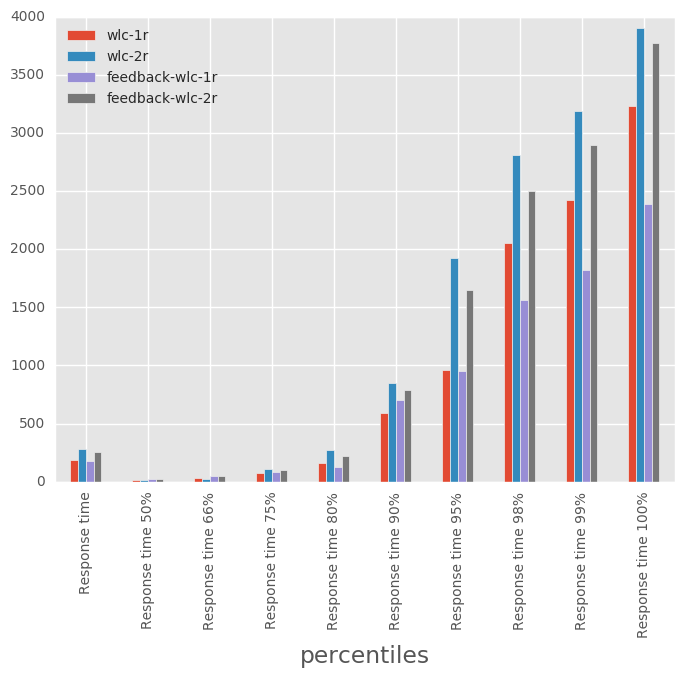

In [21]:
rt_plot.plot('percentiles', kind='bar')